$$\textbf{PLN. Examen 1: Minería de texto para Turismo}$$
$$\textit{Y. Sarahi García Gozález}$$

<font size=4.5 color='lightblue'>

$\textit{Librerías}$

In [283]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import re

<font size=4.5 color='lightblue'>

$\textit{Preprocesamiento de los datos}$

In [215]:
#obtenemos los nombres de cada hoja del excel
path="/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/lenguaje/Proyecto_1_lenguaje/"
excel = openpyxl.load_workbook(path+"Opiniones.xlsx")
nombres = excel.sheetnames
excel.close()
# Eliminamos los números de los nombres de las hojas
solo_nombres= [re.sub(r'[\d,]+', '', nombre).strip() for nombre in nombres]
solo_nombres

['Basilica Colegiata',
 'Mercado Hidalgo',
 'Casa de Diego Rivera',
 'Universidad de Guanajuato',
 'Alhóndiga',
 'Teatro Juárez',
 'Jardín de la Unión',
 'Callejón del Beso',
 'Monumento Pípila',
 'Museo de las Momias']

In [216]:
dataframes_por_hoja = {}# diccionario para almacenar los DataFrames
for nombre_hoja in nombres: #Iteramos sobre cada hoja del excel
    #creamos un dataframe para cada hoja
    df = pd.read_excel(path+"Opiniones.xlsx",sheet_name= nombre_hoja) 
    # Agregamos el DF al diccionario
    dataframes_por_hoja[nombre_hoja] = df

In [217]:
for nombre_hoja in nombres: #Iteramos sobre cada hoja del excel
    #eliminamos las columnas que no utilizaremos 
    dataframes_por_hoja[nombre_hoja] = dataframes_por_hoja[nombre_hoja].drop(columns=["Dispositivo","Número de aportaciones"])
    # Reemplazamos los valores 'Femenino' y 'Masculino' por 0 y 1, respectivamente
    dataframes_por_hoja[nombre_hoja]['Género'] = dataframes_por_hoja[nombre_hoja]['Género'].replace({'Femenino': 0, 'Masculino': 1,' Masculino':1,'masculino':1})
    dataframes_por_hoja[nombre_hoja]['Nacional ó Internacional'] = dataframes_por_hoja[nombre_hoja]['Nacional ó Internacional'].replace({'Nacional': 0, 'Internacional': 1})

In [218]:
#Ejemplo de DF final
print("Hoja de ", nombres[2])
dataframes_por_hoja[nombres[2]].head()

Hoja de  Casa de Diego Rivera 698


,Género,Edad,Nacional ó Internacional,Calificación,Escala,Título de la opinión,Opinión,País,Idioma,Fecha
0,0,25.0,1,Muy bueno,4,"""Diego was Talented at Portraiture""","""Interesting small museum. The downstairs is t...",Estados Unidos,Inglés,2016-05-22
1,0,27.0,1,Muy bueno,4,"""Hermoso museo""","""Ubicado en la zona turística la casa donde el...",Argentina,Español,2016-05-21
2,0,25.0,0,Muy bueno,4,"""Visita diver-cultural... :)""","""La exposición de obras de Diego Rivera es muy...",México,Español,2016-05-20
3,1,34.0,1,Excelente,5,"""A great place to pay homage to the great pain...","""Diego Rivera was born in Guanajuato and his f...",Colombia,Inglés,2016-05-19
4,1,60.0,1,Muy bueno,4,"""Deeper insight into the artist plus other hig...","""If you are interested in the man and his hist...",Estados Unidos,Inglés,2016-05-18


<font size=4.5 color='lightblue'>

$\textit{Preprocesamiento del texto}$

In [290]:
#lista de signos de puntuación
puntuacion = set(string.punctuation)

#definimos una función para quitar signos de puntuación y hacerlas minúsculas
def limpiar_opinion(opinion):
    opinion_sin_puntuacion = ''.join(caracter for caracter in opinion if caracter not in puntuacion)
    return opinion_sin_puntuacion.lower()

In [303]:
listas_opiniones = []  #listas de opiniones de cada hoja
listas_escala=[] #lista de las escalas de cada escala
listas_opiniones_limpia = [] #listas de opiniones de cada hoja sin signos de puntuacion y en minusculas

for nombre_hoja in nombres:
    #Seleccionamos todas las opiniones de la hoja actual y creamos una lista de strings
    opiniones_hoja = [opinion.strip('"') for opinion in dataframes_por_hoja[nombre_hoja]['Opinión']]
    #Seleccionamos todas las opiniones de la hoja actual, pasamos el string a la función que limpia el texto y creamos una lista de strings
    lista_limpia = [limpiar_opinion(opinion.strip('"')) for opinion in dataframes_por_hoja[nombre_hoja]['Opinión']]
    #Seleccionamos todas las escalas de la hoja actual y creamos una lista de strings
    escala_hoja=[escala for escala in dataframes_por_hoja[nombre_hoja]['Escala']]

    #agregamos cada lista de de strings a una unica lista
    listas_opiniones.append(opiniones_hoja)
    listas_escala.append(escala_hoja)
    listas_opiniones_limpia.append(lista_limpia)

A continuación un ejemplo de estas tres listas para la basílica:

In [301]:
listas_opiniones[0][:20]

['Basílica muy bien conservada, punto central en la ciudad , muy linda por dentro vale la pena darse una vuelta para conocer , alto significado religioso y arquitectónico.',
 'The Basilica (Guanajuato does not have a Cathedral, it is situated in the nearby city of Leon) is truly imposing both during the day and when illuminated at night. It also has some lovely polychrome sculpture and a great organ.',
 'Edificio de la iglesia amarilla es un abigarrado y nahu crear una más bella de Atocha. He venido a cabo mejor en frente de la misma Guanajuato es menor cuando se toman fotografías que gabolman menos una.',
 'A must see place in town and very nice to go inside and beautiful outside to take pics. in the center of town!',
 'Not particularly impressive, but if you like historic buildings of any type, this is worth a walk-in.',
 'Wandered into the church on a Sunday evening during mass. The lovely chandeliers were alit and looked beautiful. The outside is also lighted at night and, though n

In [304]:
listas_opiniones_limpia[0][:20]

['basílica muy bien conservada punto central en la ciudad  muy linda por dentro vale la pena darse una vuelta para conocer  alto significado religioso y arquitectónico',
 'the basilica guanajuato does not have a cathedral it is situated in the nearby city of leon is truly imposing both during the day and when illuminated at night it also has some lovely polychrome sculpture and a great organ',
 'edificio de la iglesia amarilla es un abigarrado y nahu crear una más bella de atocha he venido a cabo mejor en frente de la misma guanajuato es menor cuando se toman fotografías que gabolman menos una',
 'a must see place in town and very nice to go inside and beautiful outside to take pics in the center of town',
 'not particularly impressive but if you like historic buildings of any type this is worth a walkin',
 'wandered into the church on a sunday evening during mass the lovely chandeliers were alit and looked beautiful the outside is also lighted at night and though not huge it certainly

In [305]:
listas_escala[0][:20]

[4, 5, 5, 5, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4]

<font size=4.5 color='lightblue'>

$\textit{Actividades}$

<font size=2.5 color='lightblue'>

* $\textit{Ejercicio 1}$


In [355]:
promedios=[]
for nombre_hoja,solo_nombre in zip(nombres,solo_nombres): #Iteramos sobre cada hoja del excel
    prom=dataframes_por_hoja[nombre_hoja]["Escala"].mean()
    promedios.append((solo_nombre,prom))
    print("\n")
    print("*", solo_nombre)
    print("Total de calificaciones: ",dataframes_por_hoja[nombre_hoja]["Escala"].shape)
    print("Promedio: ",prom)
    print("Desviacion estándar: ",dataframes_por_hoja[nombre_hoja]["Escala"].std())
promedios = sorted(promedios, key=lambda x: x[1])



* Basilica Colegiata
Total de calificaciones:  (560,)
Promedio:  4.5
Desviacion estándar:  0.6687504702153396


* Mercado Hidalgo
Total de calificaciones:  (600,)
Promedio:  3.9483333333333333
Desviacion estándar:  0.9507033977392814


* Casa de Diego Rivera
Total de calificaciones:  (698,)
Promedio:  4.243553008595988
Desviacion estándar:  0.8040392901549579


* Universidad de Guanajuato
Total de calificaciones:  (900,)
Promedio:  4.6033333333333335
Desviacion estándar:  0.6126130687218946


* Alhóndiga
Total de calificaciones:  (930,)
Promedio:  4.45483870967742
Desviacion estándar:  0.7457112582889636


* Teatro Juárez
Total de calificaciones:  (1010,)
Promedio:  4.702970297029703
Desviacion estándar:  0.5181455546147319


* Jardín de la Unión
Total de calificaciones:  (1134,)
Promedio:  4.591710758377425
Desviacion estándar:  0.6073702093154869


* Callejón del Beso
Total de calificaciones:  (1360,)
Promedio:  3.9955882352941177
Desviacion estándar:  0.9712472464286253


* Monume

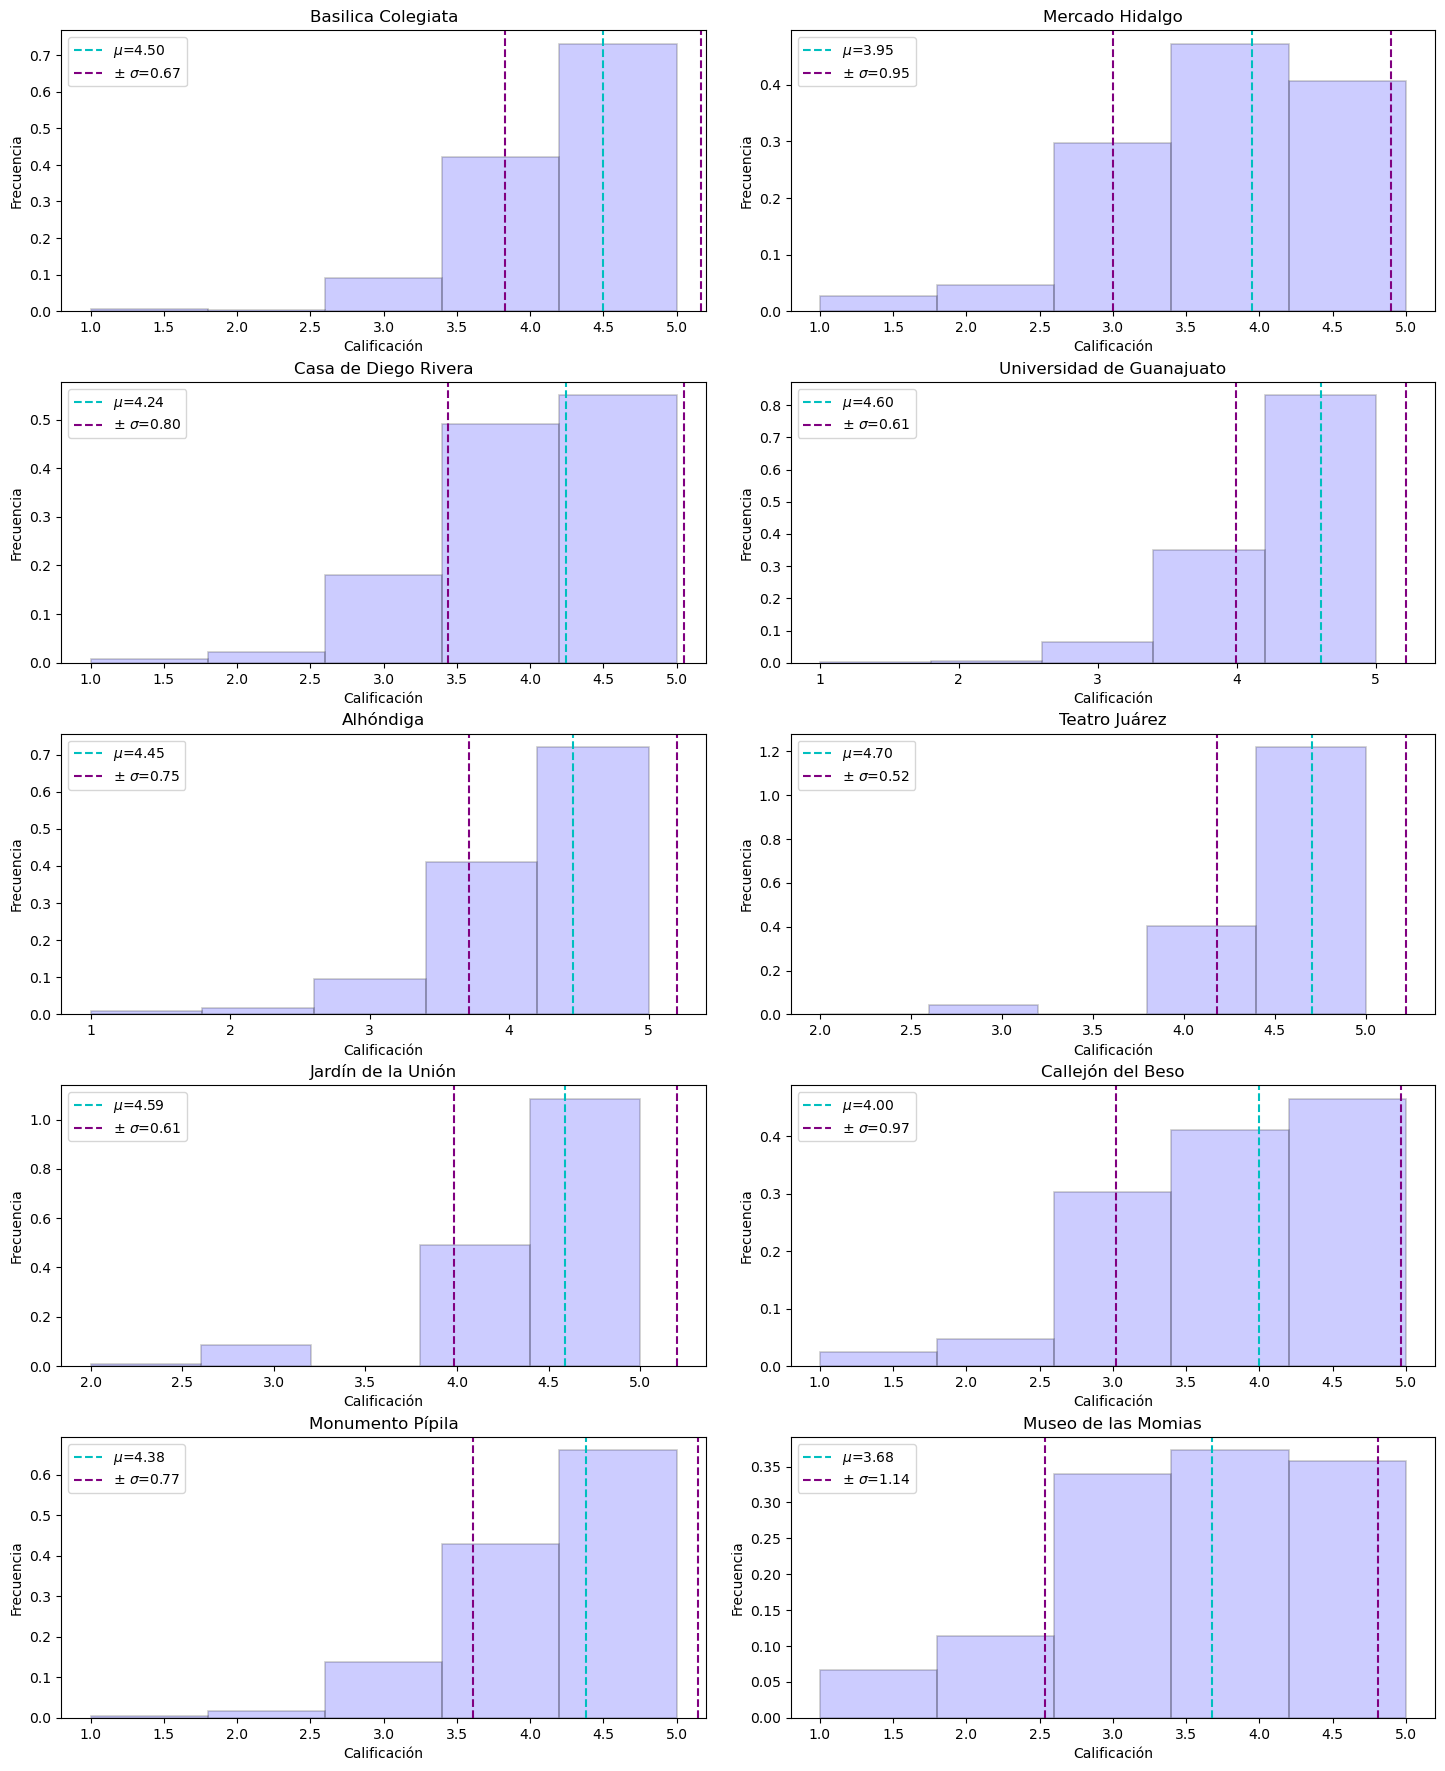

In [261]:
num_subplots = len(nombres)

#Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(5, 2, figsize=(15, 18))

#Ajusta el diseño de los subgráficos
fig.tight_layout(pad=3.0)
i=0
# Itera sobre los nombres de las hojas y crea un subgráfico para cada uno
for nombre_hoja,solo_nombre in zip(nombres,solo_nombres):

    #Selecciona el subgráfico actual
    ax = axs[i//2, i%2] if num_subplots > 1 else axs
    
    #Calcula el promedio y la desviación estándar de la columna 'Escala' para la hoja actual
    promedio = dataframes_por_hoja[nombre_hoja]['Escala'].mean()
    desviacion_estandar = dataframes_por_hoja[nombre_hoja]['Escala'].std()

    #promedio
    ax.axvline(x=promedio, color='c', linestyle='--', label=f'$\mu$={promedio:.2f}')
    #hist
    ax.hist(dataframes_por_hoja[nombre_hoja]['Escala'], bins=5, alpha=0.2, color='b', edgecolor='black', linewidth=1.2, density=True)

    #desviación estándar 
    ax.axvline(x=promedio + desviacion_estandar, color='purple', linestyle='--', label=f'$\pm$ $\sigma$={desviacion_estandar:.2f}')
    ax.axvline(x=promedio - desviacion_estandar, color='purple', linestyle='--')
  
    #título uy ejes
    ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('Calificación')
    ax.set_ylabel('Frecuencia')
    ax.legend()
    i=i+1

# Muestra los subgráficos
plt.show()

Ordenando los lugares de acuerdo a su calificación promedio (de menor a mayor), tenemos que:

In [222]:
promedios

[('Museo de las Momias', 3.6751515151515153),
 ('Mercado Hidalgo', 3.9483333333333333),
 ('Callejón del Beso', 3.9955882352941177),
 ('Casa de Diego Rivera', 4.243553008595988),
 ('Monumento Pípila', 4.377777777777778),
 ('Alhóndiga', 4.45483870967742),
 ('Basilica Colegiata', 4.5),
 ('Jardín de la Unión', 4.591710758377425),
 ('Universidad de Guanajuato', 4.6033333333333335),
 ('Teatro Juárez', 4.702970297029703)]

In [348]:
numero_palabras = []  # Lista para almacenar las longitudes de los comentarios
for lista_opiniones_hoja in listas_opiniones_limpia:
    # Obtener las longitudes de cada comentario en la hoja actual y agregarlas a la lista
    longitudes_hoja = [len(opinion.split()) for opinion in lista_opiniones_hoja]
    numero_palabras.append(longitudes_hoja)

#agregamos la longitud al dataframe
for i,nombre_hoja in enumerate(nombres): #Iteramos sobre cada hoja del excel 
    dataframes_por_hoja[nombre_hoja]['longitud']= numero_palabras[i]

In [361]:
promedios_longitud=[]
print("Tomando en cuenta sólo EL NÚMERO DE PALABRAS en las opiniones (no singos, no espacios etc):")
for nombre_hoja,solo_nombre in zip(nombres,solo_nombres): #Iteramos sobre cada hoja del excel
    prom=dataframes_por_hoja[nombre_hoja]["longitud"].mean()
    promedios_longitud.append((solo_nombre,prom))
    print("\n")
    print("*", solo_nombre)
    print("Promedio: ",prom)
    print("Desviacion estándar: ",dataframes_por_hoja[nombre_hoja]["longitud"].std())
    print("max: ",dataframes_por_hoja[nombre_hoja]["longitud"].max(),", mín: ",dataframes_por_hoja[nombre_hoja]["longitud"].min())


Tomando en cuenta sólo EL NÚMERO DE PALABRAS en las opiniones (no singos, no espacios etc):


* Basilica Colegiata
Promedio:  39.614285714285714
Desviacion estándar:  29.35601853412387
max:  253 , mín:  7


* Mercado Hidalgo
Promedio:  45.52333333333333
Desviacion estándar:  33.45342046972321
max:  394 , mín:  9


* Casa de Diego Rivera
Promedio:  49.15042979942693
Desviacion estándar:  30.39432866544417
max:  259 , mín:  12


* Universidad de Guanajuato
Promedio:  35.33777777777778
Desviacion estándar:  20.012657717456733
max:  205 , mín:  8


* Alhóndiga
Promedio:  46.44731182795699
Desviacion estándar:  33.88351346440856
max:  388 , mín:  8


* Teatro Juárez
Promedio:  41.4039603960396
Desviacion estándar:  27.06119746947791
max:  288 , mín:  7


* Jardín de la Unión
Promedio:  43.023809523809526
Desviacion estándar:  36.87054662495047
max:  549 , mín:  9


* Callejón del Beso
Promedio:  45.453676470588235
Desviacion estándar:  32.85906625553907
max:  669 , mín:  7


* Monumento Píp

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/lenguaje/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/lenguaje/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/lenguaje/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ely/Document

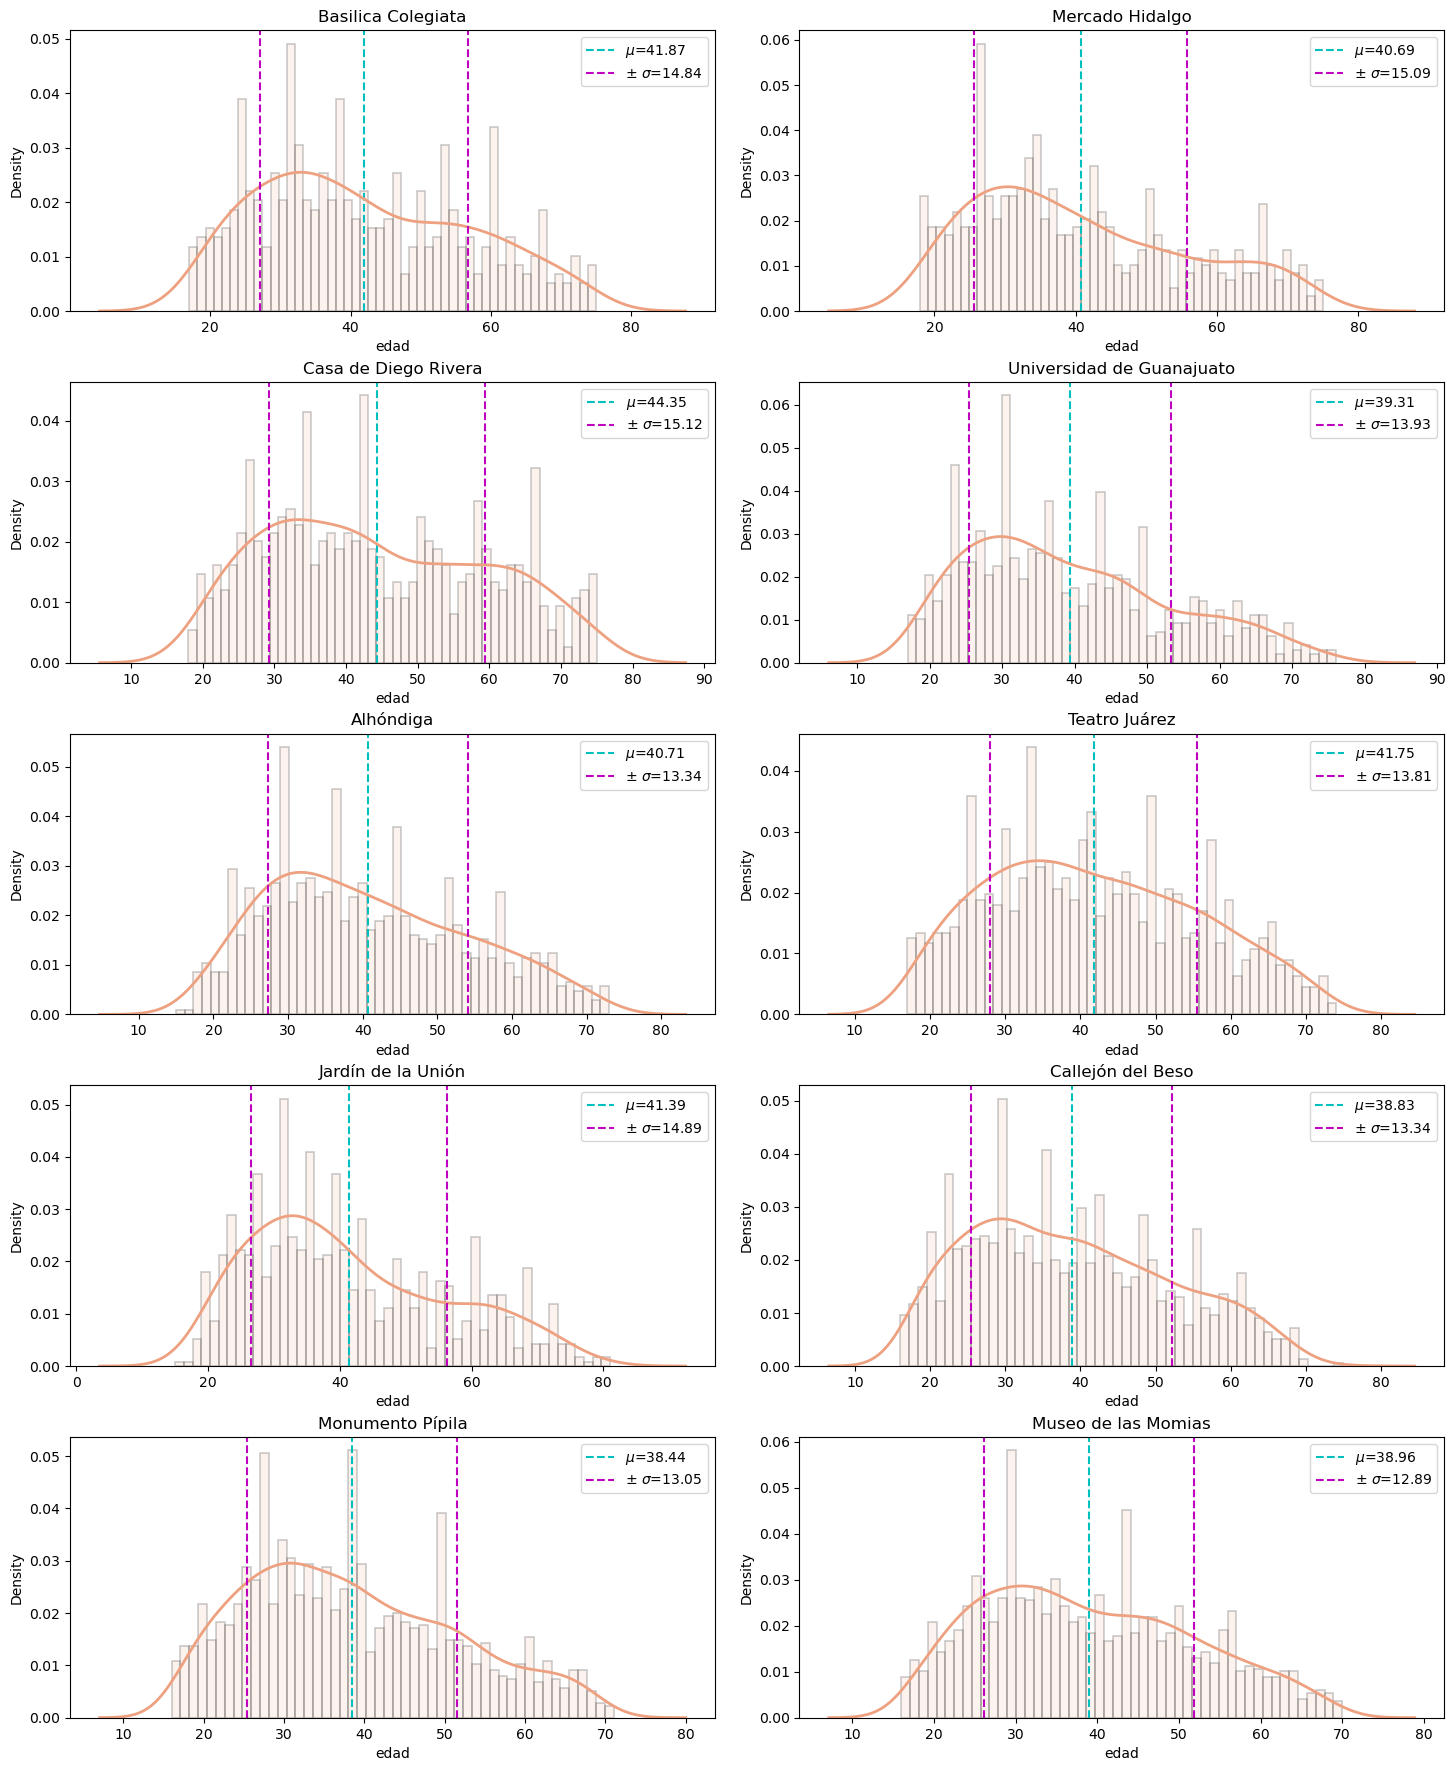

In [260]:
# Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(5, 2, figsize=(15, 18))

# Ajusta el diseño de los subgráficos
fig.tight_layout(pad=3.0)
i=0
# Itera sobre los nombres de las hojas y crea un subgráfico para cada uno
for nombre_hoja,solo_nombre in zip(nombres,solo_nombres):

    # Selecciona el subgráfico actual
    ax = axs[i//2, i%2] if num_subplots > 1 else axs
    
    # Calcula el promedio y la desviación estándar de la columna 'Edad' para la hoja actual
    promedio = dataframes_por_hoja[nombre_hoja]['Edad'].mean()
    desviacion_estandar = dataframes_por_hoja[nombre_hoja]['Edad'].std()


    ax.axvline(x=promedio, color='c', linestyle='--', label=f'$\mu$={promedio:.2f}')
    #hist
    ax.hist(dataframes_por_hoja[nombre_hoja]['Edad'], bins=50,alpha=0.2, color="#f4c2ad", edgecolor='black', linewidth=1.2, density=True)
    sns.kdeplot(data=dataframes_por_hoja[nombre_hoja]['Edad'], color='#eea180', ax=ax, linewidth=2)
    #desviación estándar 
    ax.axvline(x=promedio + desviacion_estandar, color='m', linestyle='--', label=f'$\pm$ $\sigma$={desviacion_estandar:.2f}')
    ax.axvline(x=promedio - desviacion_estandar, color='m', linestyle='--')
    #título uy ejes
    ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('edad')
    ax.legend()
    i=i+1
# Muestra los subgráficos
plt.show()

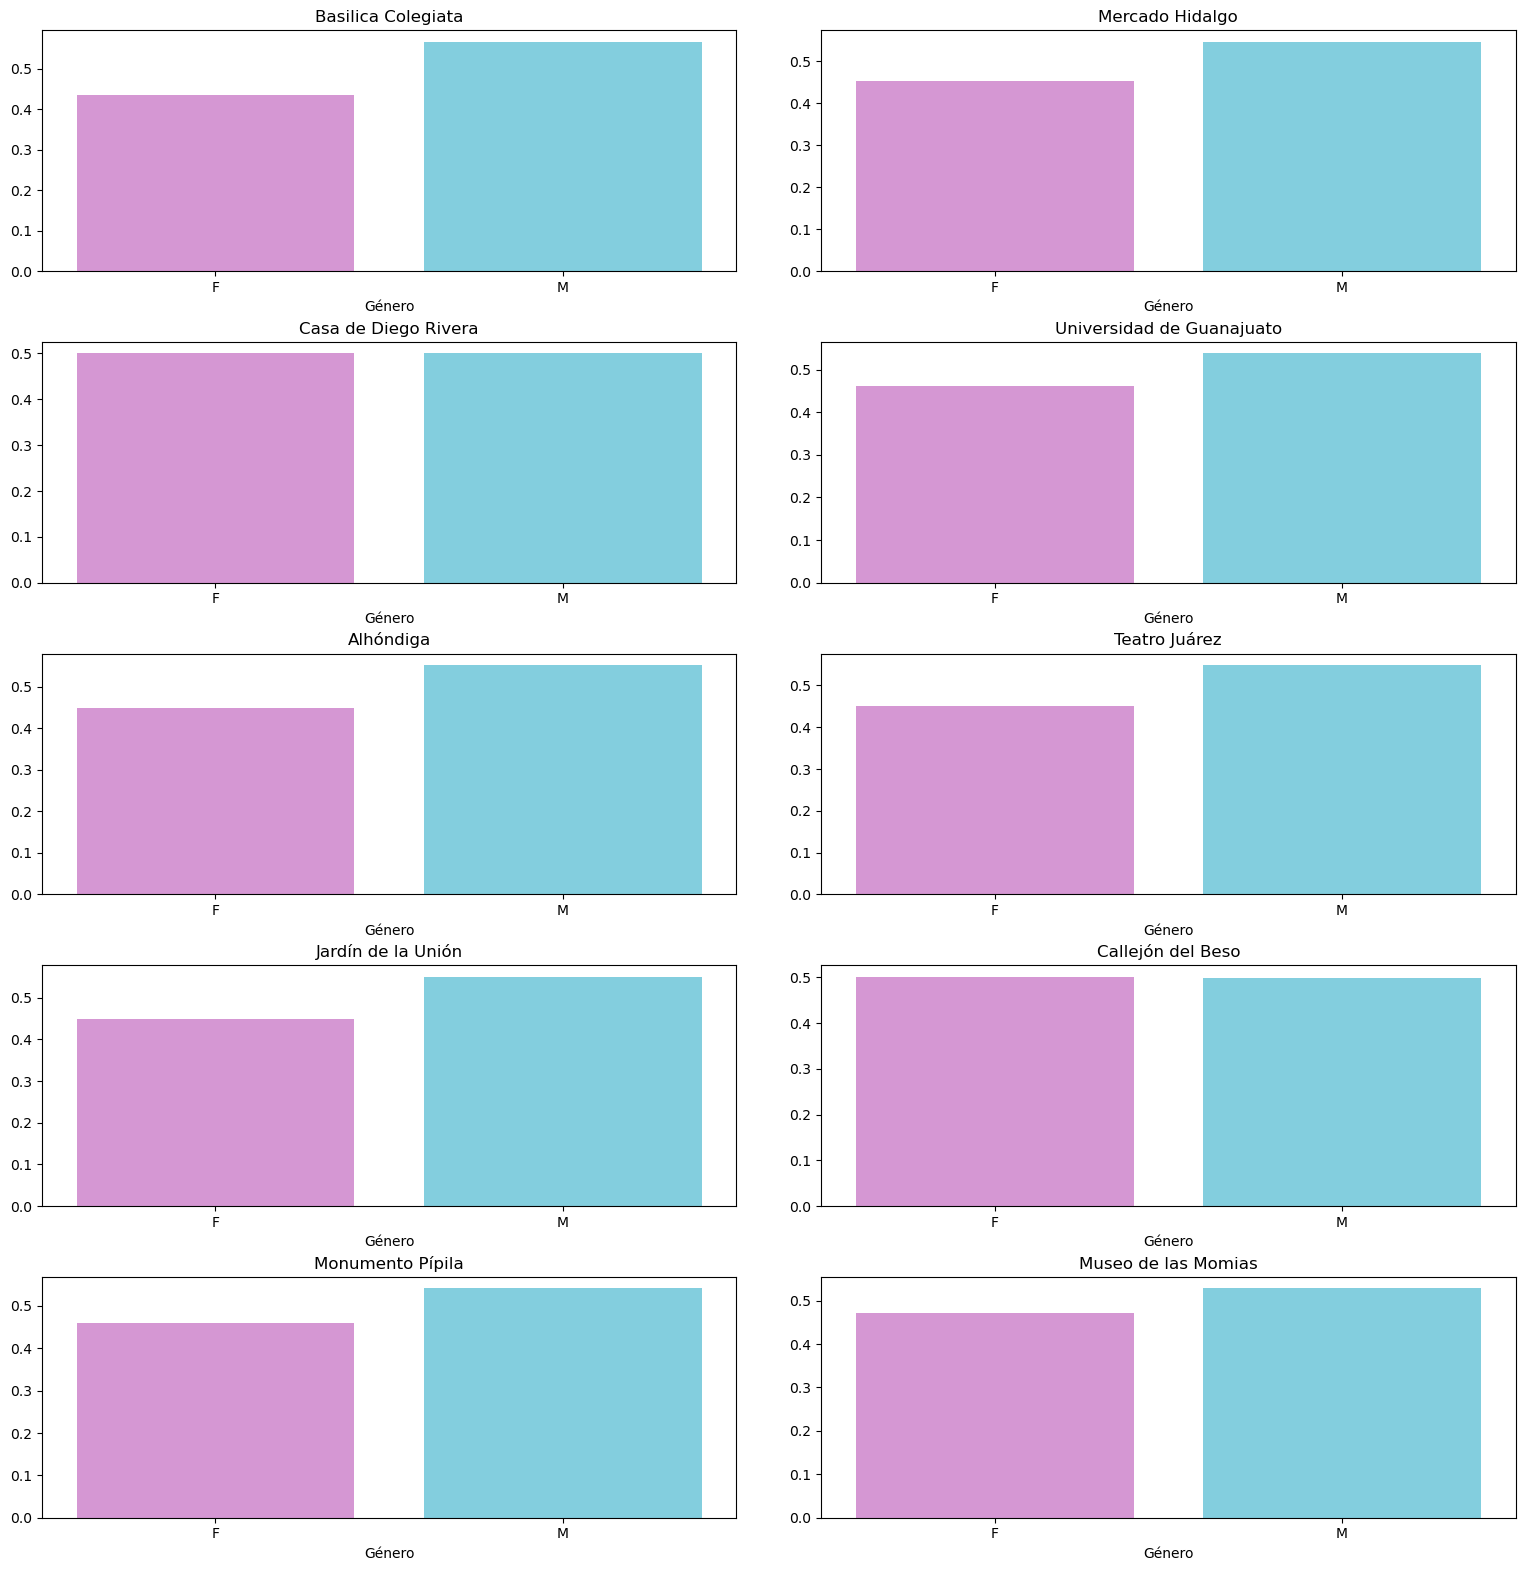

In [243]:
# Define colors to use
colors = ['#df8ddd','#74d8ed' ]
ticklabels = ['F', 'M']
# Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(5, 2, figsize=(16, 16))

# Ajusta el diseño de los subgráficos
fig.tight_layout(pad=3.0)
i = 0

# Itera sobre los nombres de las hojas y crea un subgráfico para cada uno
for nombre_hoja, solo_nombre in zip(nombres, solo_nombres):

    # Selecciona el subgráfico actual
    ax = axs[i//2, i%2] if num_subplots > 1 else axs

    # Grafica el barplot de las proporciones de 'Género'
    sns.barplot(x=dataframes_por_hoja[nombre_hoja]['Género'].value_counts(normalize=True).index, 
                y=dataframes_por_hoja[nombre_hoja]['Género'].value_counts(normalize=True).values, 
                ax=ax,palette=colors)

    # Cambia las etiquetas del eje x
    ax.set_xticklabels(ticklabels)
    # Título y ejes
    ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('Género')
    i += 1

# Mostrar los subgráficos
plt.show()


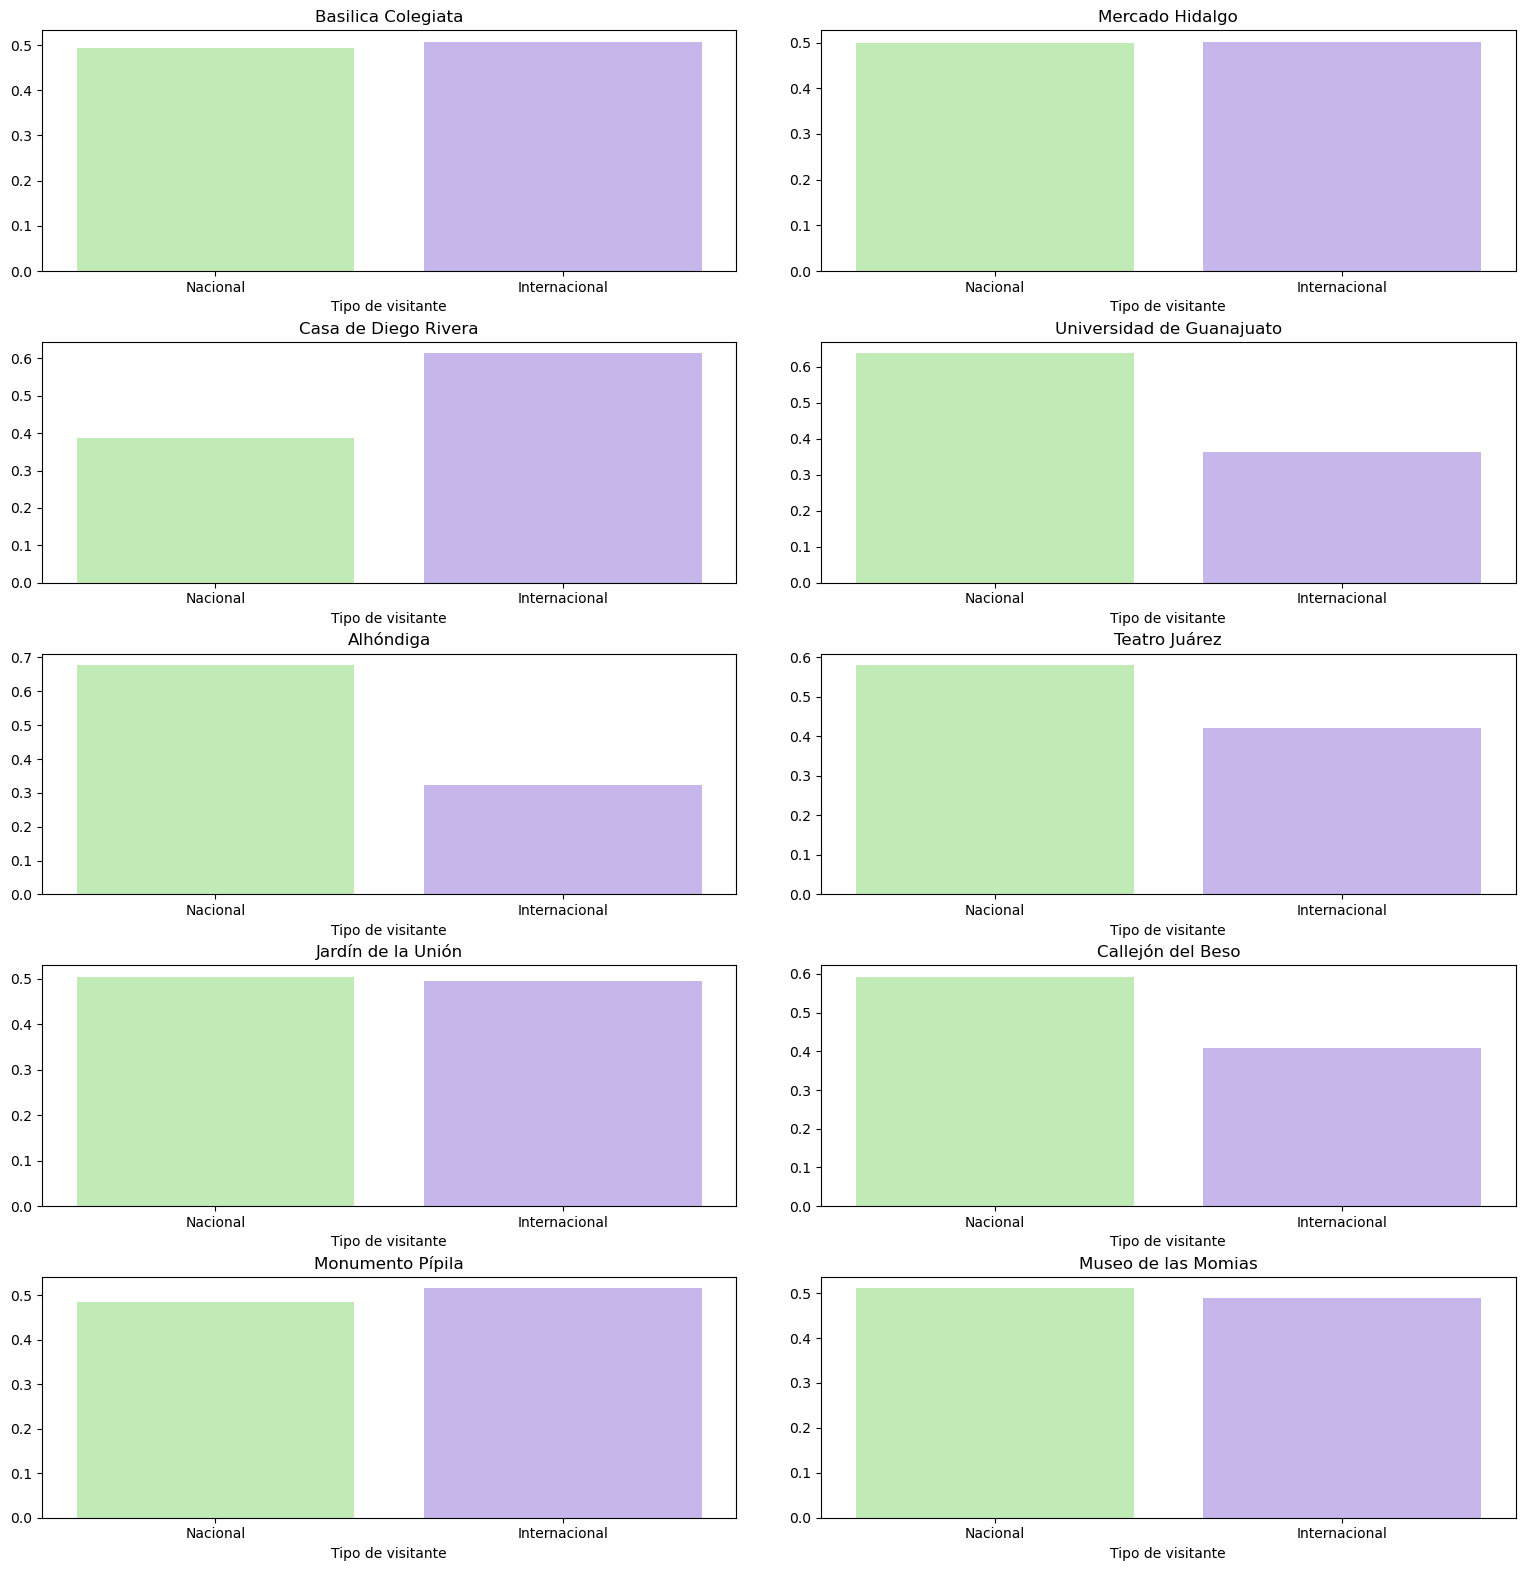

In [242]:
# Define colors to use
colors = ['#bcf4ad','#c2adf4' ]
ticklabels = ['Nacional', 'Internacional']
# Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(5, 2, figsize=(16, 16))

# Ajusta el diseño de los subgráficos
fig.tight_layout(pad=3.0)
i = 0

# Itera sobre los nombres de las hojas y crea un subgráfico para cada uno
for nombre_hoja, solo_nombre in zip(nombres, solo_nombres):

    # Selecciona el subgráfico actual
    ax = axs[i//2, i%2] if num_subplots > 1 else axs

    # Grafica el barplot de las proporciones de 'Género'
    sns.barplot(x=dataframes_por_hoja[nombre_hoja]['Nacional ó Internacional'].value_counts(normalize=True).index, 
                y=dataframes_por_hoja[nombre_hoja]['Nacional ó Internacional'].value_counts(normalize=True).values, 
                ax=ax,palette=colors)

    # Cambia las etiquetas del eje x
    ax.set_xticklabels(ticklabels)

    # Título y ejes
    ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('Tipo de visitante')

    i += 1

# Mostrar los subgráficos
plt.show()

<font size=2.5 color='lightblue'>

* $\textit{Ejercicio 2}$

In [ ]:
def nube_palabras():
    